Author: Sami Mwanje, 
mm223kk@student.lnu.se

In [317]:
import matplotlib.pyplot as plt
import numpy as np

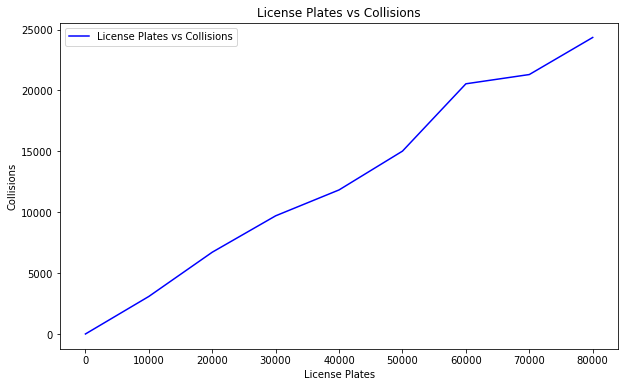

In [318]:
sum = np.loadtxt('Collisions_3_2.csv', delimiter=',') # Get all results.
X = sum[:,0:1] # Reoder the columns.
y = sum[:,1:]


plt.figure(figsize=(10, 6))
plt.plot(X, y, "b-", label='License Plates vs Collisions')
plt.title('License Plates vs Collisions')
plt.xlabel('License Plates')
plt.ylabel('Collisions')
plt.legend()
plt.show()

The graph above shows how many collisions are needed for an amount of license plates. Starting from 0 to 80000. 0 is included to have a clean start value. We can almost see a linear graph above where the growth of collisions is about 3000x for each 10 000s license plate. This value can of course become much lower with a better "hashCode()" function in the Vehicles class.

The graph shows us that the more "keys" that are loaded the more likely it is a collision will occur. This should be obvious since it is more likely that an index/bucket is already filled with a key if we are working with a large amount of keys/data. Though the hash table expands with each iteration and rehashes each value with a new prime number, collision are still likely to occur. 

A very good hash function will probably make collisions less likely since it may be better to vary between each vehicle license plate. Another thing that has an effect of how many collisions that may occur is the prime number, which also is the size of the hash table. 

A very large prime number is more likely to create a larger spread between each filled bucket. This will decrease the change of a collision. Though the may be cost full for the memory since, more unfilled buckets are initialized without being filled. More on this in the second graph.

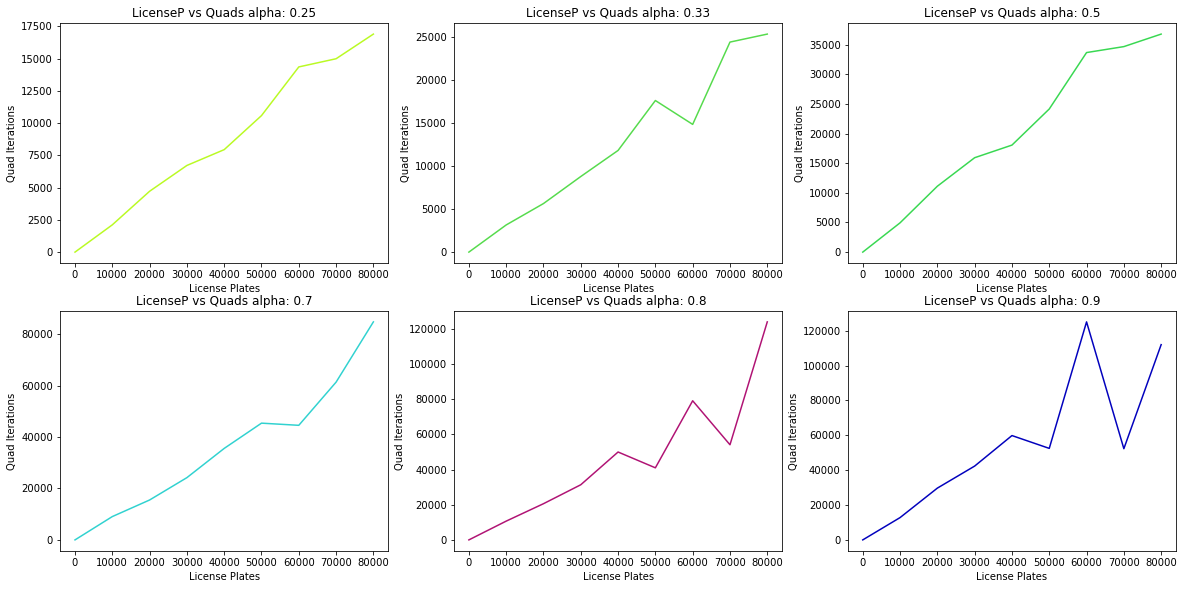

In [319]:
alphaV = [0.25,0.33,0.5,0.7,0.8,0.9]
plt.figure(figsize=(20, 15))
for alpha in range(1, 7): 
    currentAlpha = alphaV[alpha-1]  # Set current alpha. (Offset for size for what the size of keys should be. alpha = n/m)
    sum = np.loadtxt('QuadIterations_3_2_'+str(currentAlpha)+'.csv', delimiter=',') # Get all results.
    X = sum[:,0:1] # Get the x values. ( Collisions)
    y = sum[:,1:]  # Get the y values. ( Quades/Probes)

    plt.subplot(3, 3, alpha)        # Initialize subplot
    plt.plot(X, y, c=np.random.rand(3,))    # Plot y(x) with a random color.
    plt.title('LicenseP vs Quads alpha: '+str(currentAlpha))    # Set title of current plot.
    plt.xlabel('License Plates')    # Set x label
    plt.ylabel('Quad Iterations')   # Set y label.
plt.show()

Above us we see six different graphs. These graphs show us how many "quad iterations" that after a collision has occurred. The x-axe is for the amount of license plates. And the y-axe is the amount of quads due to the size of the hash table. A quad iteration occurs after a collision has been found. This is when the program has to look for an empty index/bucket using hashCode = hashCode + (i) ^2. Each change of the hash code is a "quad iteration".

The difference between each graph is that they use a different alpha offset. The alpha offset state alpha = n/m. N is the amount of keys and m is the size of the hash table/ prime number. For example, an alpha of 0.25 means that after 25 % of the buckets have been filled, the hash table should rehash to around double the size. The size is always a prime number.

We can above see that a different alpha offset has a different effect on the graph's shape. For example, resizes after about 90 % of the buckets have been filled (0.9) will lead to more iterations than 25 %.

We see that less iterations are needed the faster we resize the hash table. Though a low alpha may seem the way to go when judging be numbers, it may be cost full. Many empty buckets may take unneeded memory. Therefore, it may be better to update as late as possible, so we can get benefits in both memory and less "quad iterations". 

The best choice here may be graph 3, which has an alpha of 0,5. With this alpha we combine saving memory with speed. We can see that a maximum amount of 35 000 iterations are needed when a collision occur of a bucket with the size 30000. If we go further up to and alpha of 0.7 the growth becomes much larger than the growth between alpha 0,33 and 0,5.

There are probably many more offsets that can be analyzed, such as resize prime numbers, hash function variables, and much more. I found these above as most necessary and used therefor those for the result.